## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mousecount = len(mousestudy_df['Mouse ID'].unique())
mousecount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = mousestudy_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
mousecount = len(clean_df['Mouse ID'].unique())
mousecount

249

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#sort by drug regimen
tumor_drug_df = clean_df.groupby(["Drug Regimen"])
tumor_drug_df

#calculate mean
tumor_mean = tumor_drug_df['Tumor Volume (mm3)'].mean()
tumor_mean

#calculate median
tumor_median = tumor_drug_df['Tumor Volume (mm3)'].median()
tumor_median

#calculate varience
tumor_variance = tumor_drug_df['Tumor Volume (mm3)'].var()
tumor_variance

#calculate standard deviation
tumor_std = tumor_drug_df['Tumor Volume (mm3)'].std()
tumor_std

#calculate SEM
tumor_sem = tumor_drug_df['Tumor Volume (mm3)'].sem()
tumor_sem

# Assemble the resulting series into a single summary dataframe.
drug_tumor_stats_df = pd.DataFrame({"Mean": tumor_mean,
                                    "Median": tumor_median,
                                    "Variance": tumor_variance,
                                    "Standard Deviation": tumor_std,
                                    "SEM": tumor_sem
                                   })
drug_tumor_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#tumor_drug_df.agg(({"Mean": [tumor_mean], "Median": [tumor_median], "Variance": [tumor_variance], "Standard Deviation": [tumor_std], "SEM": [tumor_sem]})

## Bar and Pie Charts

In [6]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#sort the df by drug
drug_df = clean_df.groupby(["Drug Regimen"])
drug_df.head()
#make a count for each of the mice within the drug regimen
mousecount = drug_df['Mouse ID'].count()
mousecount
#assemble df
drug_df = pd.DataFrame({'Mouse Count': mousecount})
drug_df

,Mouse Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


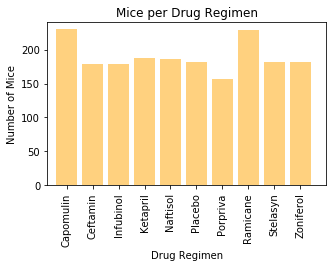

In [7]:
x_axis = np.arange(len(drug_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(5,3))
plt.bar(x_axis, mousecount, color='orange', alpha=0.5, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Porpriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mousecount)+10)

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

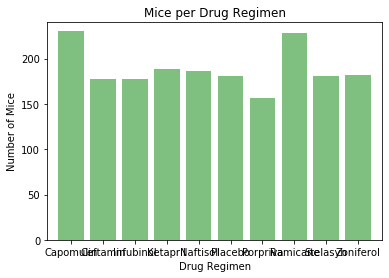

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Porpriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(drugs))

plt.bar(x_axis, mousecount, color='green', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mousecount)+10)

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [9]:
gender_df = clean_df.groupby(["Sex"])
gender_df.head()
#make a count for each of the mice within the drug regimen
mousecount = gender_df['Mouse ID'].count()
mousecount
#assemble df
gender_df = pd.DataFrame({"Mouse Count": mousecount})
gender_df

,Mouse Count
Sex,
Female,930
Male,958


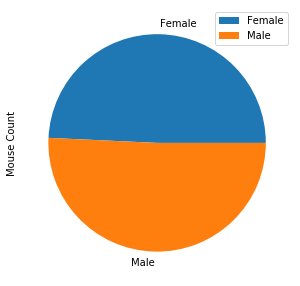

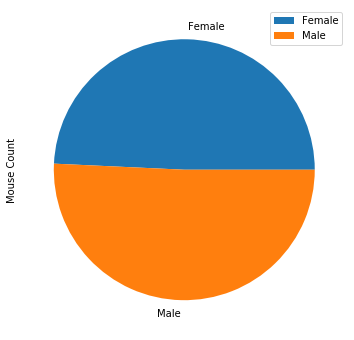

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot = gender_df.plot.pie(y= "Mouse Count", figsize=(5, 5))
plot = gender_df.plot.pie(subplots=True, figsize=(11, 6))
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Female", "Male"

# The values of each section of the pie chart
sizes = gender_df['Mouse Count']

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

explode = (0.1, 0, 0, 0)

# Tells matplotlib to seperate the "Humans" section from the others
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

group_df = clean_df.groupby("Mouse ID").max()["Timepoint"]
#greatest_df = grouped_mice_df.max()
#greatest_df=greatest_df.reset_index()
group_df 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(group_df, clean_df, how="left", on=("Mouse ID", "Timepoint"))
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol_list = merge_df.loc[merge_df['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    #storing tumor volumes for each 4 drugs all loops. Second drug overrides previous one, in next loop (only have vol for one drug at a time)
    # add subset 
    tumor_data.append(tumor_vol_list)
   
    quartiles = tumor_vol_master_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol_list.loc[(tumor_vol_list < lower_bound) | (tumor_vol_list > upper_bound)]
    
    print(f"Potential outlier for {drug} is {outliers}")
    

Potential outlier for Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outlier for Ceftamin is 3      62.999356
22     56.057749
25     55.742829
89     61.849023
95     68.923185
107    67.748662
108    57.918381
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
210    67.527482
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64
Potential outlier for Infubinol is 0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
41     60.969711
50     62.435404
56     60.918767
79     67.289621
98     66.196912
102    62.117279
130    60.165180
142    55.629428
154    54.656549
171    55.650681
217    58.268442
234    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64
Potential outlier for Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)


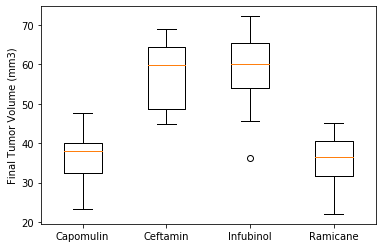

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

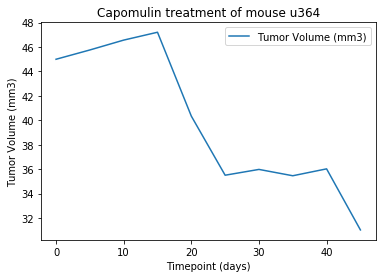

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2
99,u364,Capomulin,Male,18,17,20,40.343948,2
100,u364,Capomulin,Male,18,17,25,35.503616,2
101,u364,Capomulin,Male,18,17,30,35.978334,2
102,u364,Capomulin,Male,18,17,35,35.459490,2
103,u364,Capomulin,Male,18,17,40,36.024138,2
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin1_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

Capomulin2_df = Capomulin1_df.loc[Capomulin1_df["Mouse ID"]=="u364"]

line_plot = Capomulin2_df[["Timepoint", "Tumor Volume (mm3)"]]
line_plot = line_plot.set_index("Timepoint")

line_plot.plot.line()
x_axis = np.arange(0,45,5)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse u364")
plt.tight_layout
plt.show()
Capomulin2_df

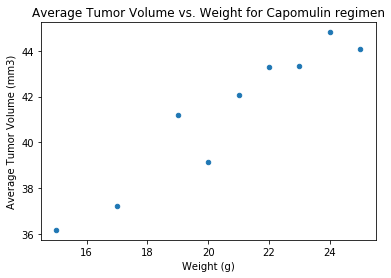

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mean_tumor_volume=Capomulin1_df.groupby(['Weight (g)']).mean()['Tumor Volume (mm3)']
mean_tumor_volume

mean_tumor_volume_df=pd.DataFrame({
    "Weight (g)" : mean_tumor_volume.index.values
    ,"Average Tumor Volume (mm3)" : mean_tumor_volume
})
mean_tumor_volume_df

mean_tumor_volume_df.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average Tumor Volume vs. Weight for Capomulin regimen")
plt.tight_layout
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
